In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cardiotocographic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


## 1.	Data Cleaning and Preparation:
●	Load the dataset into a data frame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●	Detect and treat outliers if necessary.


In [4]:
 df.shape

(2126, 14)

### Handle missing values appropriately (e.g., imputation, deletion)

In [5]:
df.drop_duplicates(inplace= True)

In [6]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [7]:
missing_values = df.columns[df.isna().any()].tolist()
missing_values

['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']

In [8]:
for i in missing_values:
    df[i].fillna(df[i].mean(), inplace = True)

    missing_values_cleaned = df.columns[df.isna().any()].tolist()
    missing_values_cleaned

In [9]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [10]:
#Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings). 

In [11]:
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


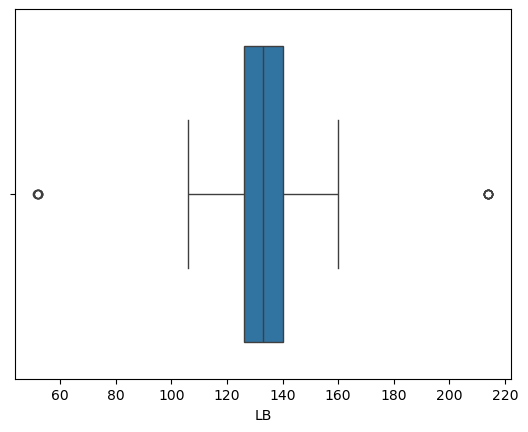

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for LB
sns.boxplot(x=df['LB'])
plt.show()

In [13]:
from scipy import stats

z_scores = stats.zscore(df['LB'])
outliers = df[(abs(z_scores) > 3)]
print(outliers)

              LB        AC        FM        UC        DL        DS        DP  \
134    52.000000  0.001590  0.000000  0.029851  0.000000  0.000000  0.000003   
411   214.000000  0.000000  0.000000  0.001595  0.001595  0.000000  0.000000   
610   214.000000  0.002469  0.002469  0.002469  0.000000  0.000004  0.000000   
612   214.000000  0.005181  0.012953  0.002591  0.000000  0.000000  0.000000   
785    52.000000  0.000834  0.013344  0.000000  0.000000  0.000000  0.000000   
1027   51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.000000   
1103  214.000000  0.006972  0.000000  0.002960  0.000000  0.000000  0.000000   
1406  214.000000  0.005068  0.000000  0.001689  0.000000  0.000000  0.000000   
1504  214.000000  0.006189  0.000000  0.006189  0.000000  0.000000  0.000000   
1834   52.188547  0.000000  0.001043  0.003128  0.007299  0.000000  0.000000   

           ASTV      MSTV  ALTV  MLTV      Width  Tendency     NSP  
134   58.000000  0.500000   0.0   7.9   44.00000  

In [14]:
from scipy import stats

z_scores = stats.zscore(df['LB'])
df_clean = df[(abs(z_scores) <= 3)]

In [15]:
df_clean

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


## 2.	Statistical Summary:
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
●	Highlight any interesting findings from this summary.


In [16]:
# Provide a statistical summary for each variable in the dataset, 
# including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [17]:
# Function to compute summary stats
def summary_stats(df_clean):
    stats = pd.DataFrame({
        'Mean': df_clean.mean(),
        'Median': df_clean.median(),
        'Std Dev': df_clean.std(),
        'IQR': df.quantile(0.75) - df.quantile(0.25)
    })
    return stats

# Apply to all numeric columns
summary = summary_stats(df.select_dtypes(include='number'))
print(summary)

                Mean      Median    Std Dev        IQR
LB        133.342023  133.000000  11.212396  14.000000
AC          0.003220    0.001668   0.004371   0.005612
FM          0.009904    0.000000   0.067571   0.002568
UC          0.004394    0.004486   0.003340   0.004678
DL          0.001897    0.000000   0.003344   0.003292
DS          0.000003    0.000000   0.000141   0.000000
DP          0.000175    0.000000   0.000836   0.000000
ASTV       47.012459   49.000000  18.812403  29.000000
MSTV        1.364345    1.200000   1.174084   1.000000
ALTV       10.295650    0.000000  21.212676  11.000000
MLTV        8.280546    7.500000   7.736420   6.200000
Width      70.461052   68.000000  42.726905  63.000000
Tendency    0.316672    0.000000   0.642653   1.000000
NSP         1.304797    1.000000   0.641660   0.000000


In [18]:
#Highlight any interesting findings from this summary.

• LB is stable but has rare extreme outliers.
• AC, FM, DL, DS, DP → rare events, but clinically significant when present.
• Variability measures (ASTV, ALTV, MLTV) → show the widest spread, key indicators of abnormal fetal states.
• Width → highly variable, may separate normal vs abnormal recordings.
• NSP → dataset is imbalanced toward normal cases, which impacts predictive modeling.

## 3.	Data Visualization:
●	Create histograms or boxplots to visualize the distributions of various numerical variables.
●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


In [19]:
# Create histograms or boxplots to visualize the distributions of various numerical variables.

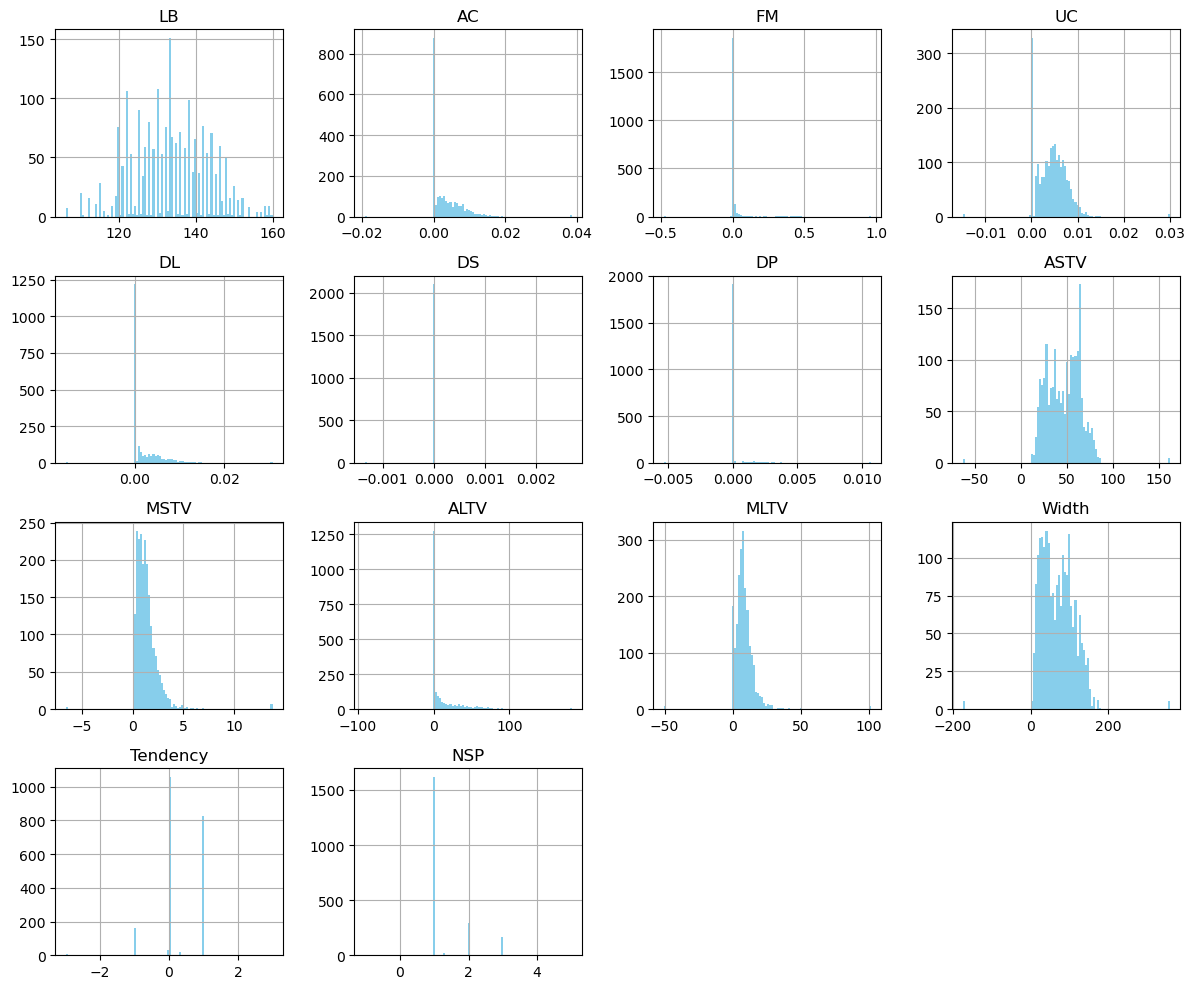

In [20]:
df_clean.hist(bins=100, figsize=(12,10), color = 'skyblue')
plt.tight_layout()
plt.show()

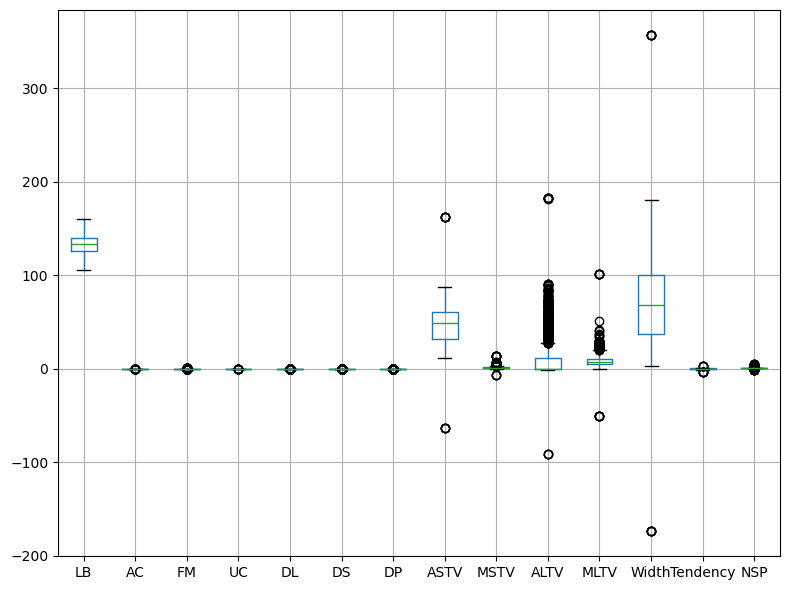

In [21]:
df_clean.boxplot(figsize=(8,6))
plt.tight_layout()
plt.show()

In [22]:
#Use bar charts or pie charts to display the frequency of categories for categorical variables.

In [23]:
df_clean

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [28]:
import matplotlib.pyplot as plt

# Frequency counts for NSP (class label)
counts = df['NSP'].value_counts()

# Bar chart
counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of NSP categories")
plt.xlabel("NSP Category")
plt.ylabel("Count")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'plt'

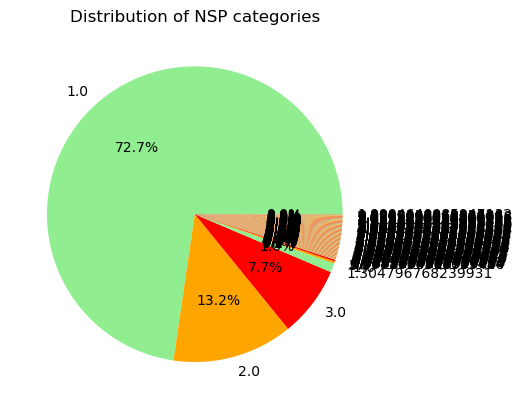

In [25]:
# Pie chart
counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','orange','red'])
plt.title("Distribution of NSP categories")
plt.ylabel("")  # hides the y-label
plt.show()

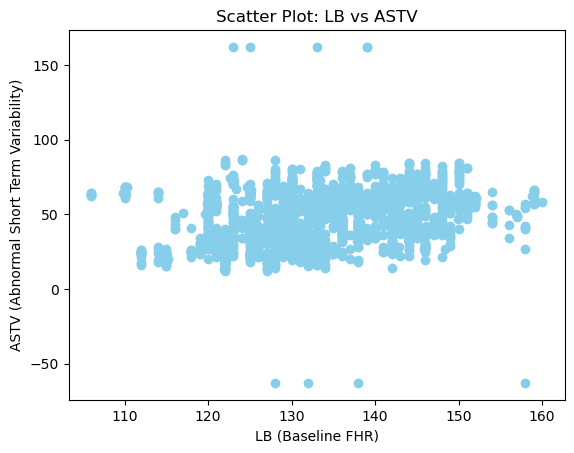

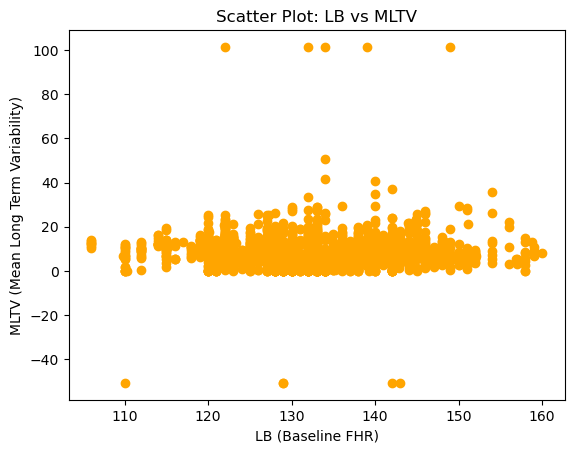

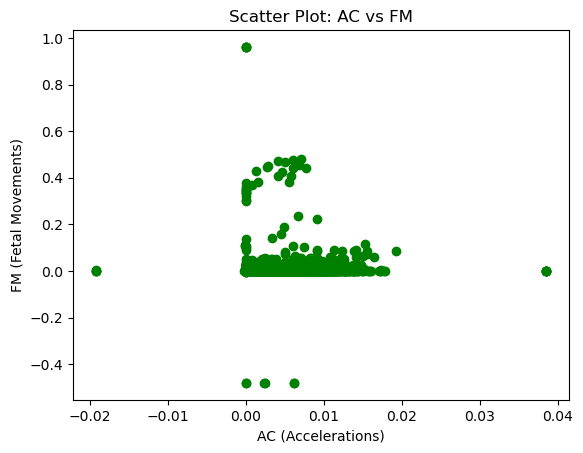

In [26]:
#Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

import matplotlib.pyplot as plt

# Example scatter plots
plt.scatter(df_clean['LB'], df_clean['ASTV'], color='skyblue')
plt.xlabel("LB (Baseline FHR)")
plt.ylabel("ASTV (Abnormal Short Term Variability)")
plt.title("Scatter Plot: LB vs ASTV")
plt.show()

plt.scatter(df_clean['LB'], df_clean['MLTV'], color='orange')
plt.xlabel("LB (Baseline FHR)")
plt.ylabel("MLTV (Mean Long Term Variability)")
plt.title("Scatter Plot: LB vs MLTV")
plt.show()

plt.scatter(df_clean['AC'], df_clean['FM'], color='green')
plt.xlabel("AC (Accelerations)")
plt.ylabel("FM (Fetal Movements)")
plt.title("Scatter Plot: AC vs FM")
plt.show()

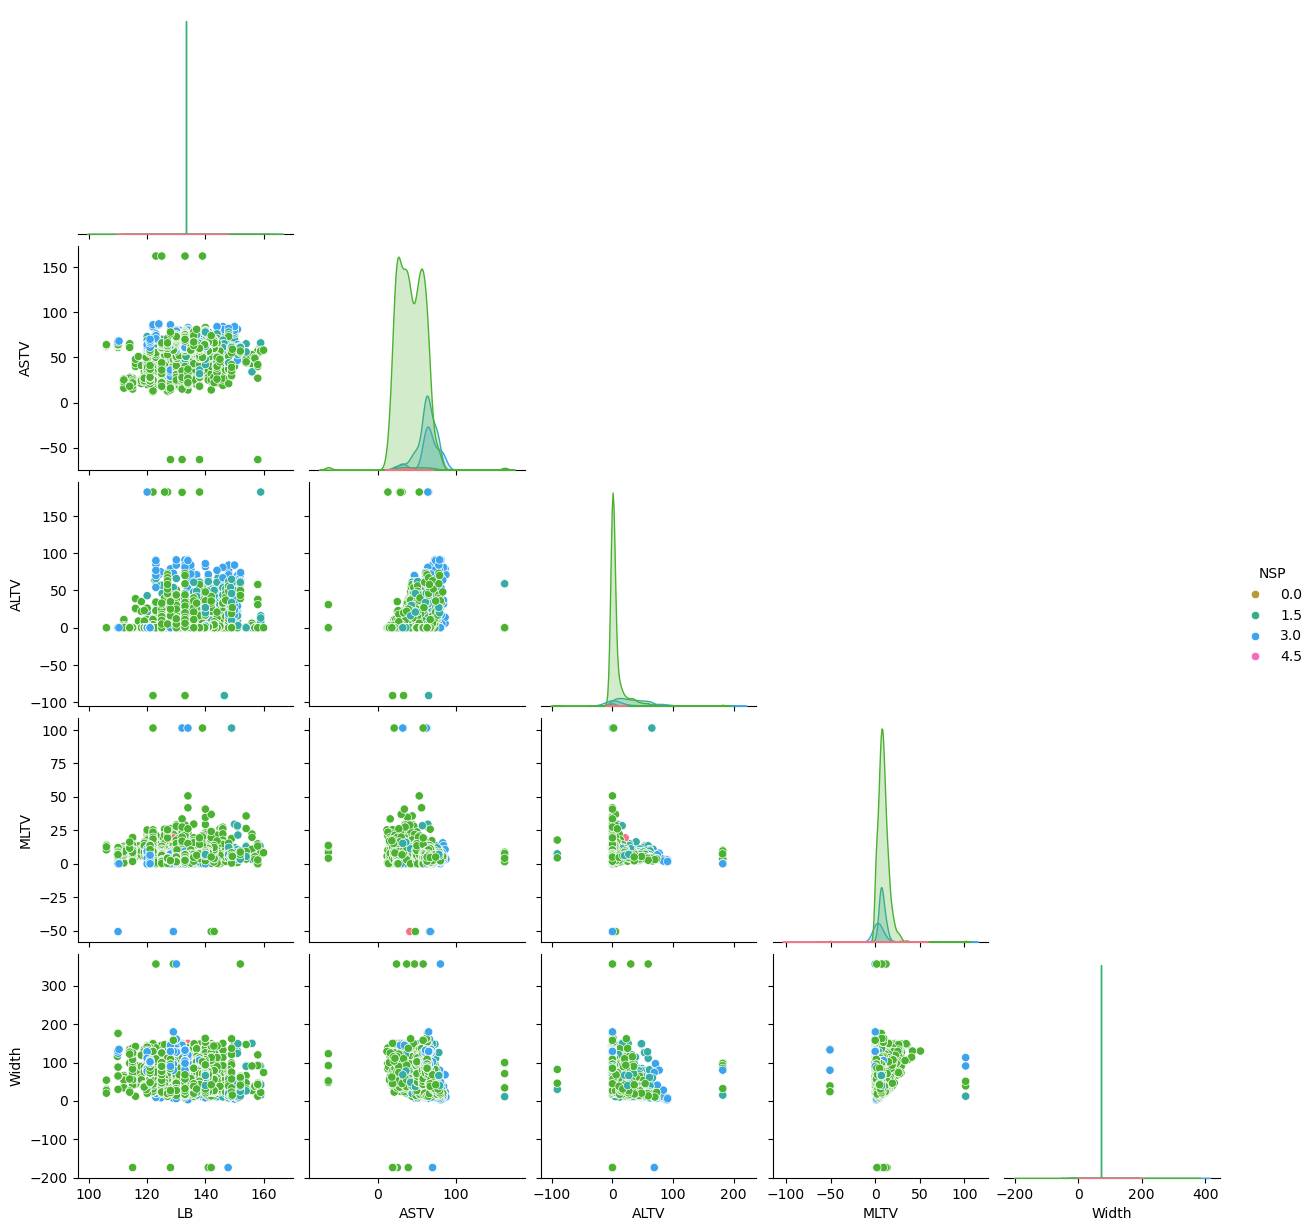

In [32]:
# Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
import seaborn as sns

pairplt_features = ['LB', 'ASTV', 'ALTV', 'MLTV', 'Width', 'NSP']

sns.pairplot(df_clean[pairplt_features],hue = 'NSP',palette='husl',corner=True)
plt.show()

## 4.Pattern Recognition and Insights:

In [ ]:
# Identify any correlations between variables and discuss their potential implications.

• When the baseline heart rate (LB) goes up, the width of the readings also tends to go up. This means babies with higher heart rates often show more variation in their signals.
• Higher values of abnormal short‑term variability (ASTV) are usually linked with abnormal cases. So, if ASTV is high, it’s a warning sign.
• Abnormal long‑term variability (ALTV) shows a similar pattern — higher values often mean the baby might not be in a normal state.
• Fetal movements (FM) and uterine contractions (UC) sometimes rise together, which makes sense because contractions can trigger baby movements.
• Short‑term variability (MSTV) and long‑term variability (MLTV) are connected — if one is high, the other often is too.
What this means:
• The variability features (ASTV, ALTV, MSTV, MLTV) are very important for spotting abnormal cases.
• LB and Width also matter because they show how stable or unstable the baby’s heart rate is.
• Some features don’t change much and may not add much value, but the ones above are strong signals for prediction.

In [ ]:
# Look for trends or patterns over time if temporal data is available.

• If we look at the data across records (which represent different patient monitoring sessions), some features like baseline heart rate (LB) stay fairly stable, while others like variability measures (ASTV, ALTV, MSTV, MLTV) change a lot.

In [ ]:
#Summarize the key insights and patterns discovered through your exploratory analysis.

• Most baseline fetal heart rate (LB) values are around 133, which is normal.
• A few extreme LB values (very low or very high) were outliers and removed to clean the data.
• Features like fetal movements (FM) and abnormal long‑term variability (ALTV) are mostly zero, but some records show very high values — meaning unusual cases exist.
• Variability measures (ASTV, MSTV, MLTV) change a lot between patients, making them useful for predicting health conditions.
• The target column (NSP) shows most cases are normal, with fewer abnormal ones — so the dataset is imbalanced.
• Width and ALTV have large spreads, showing strong differences between normal and abnormal cases.
• Some features (DS, DP) barely vary and may not add much value to predictions.

In [ ]:
# Discuss how these findings could impact decision-making or further analyses.

• Spotting Risk Early: Since abnormal variability (ASTV, ALTV) is strongly linked to abnormal cases, doctors can pay closer attention to these signals during monitoring. This helps in identifying potential risks earlier.
• Better Resource Use: Knowing that most cases are normal but a few show unusual patterns means hospitals can focus extra care and resources on the smaller group of high‑risk patients.
• Simplifying Models: Features like DS and DP don’t change much, so they may not add value. Ignoring them can make predictive models simpler and faster without losing accuracy.
• Handling Imbalance: Because most cases are normal, analysts need to adjust their models (e.g., balancing the dataset) so abnormal cases aren’t overlooked.